# Project: Investigate a Dataset (TMDB Movie Data)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction & Asking Questions:

This data set contains information about 10,000 movies collected from the Movie Database (TMDb), including user ratings and revenue.
What can we say about the success of a movie before it is released? here are some questions:
1. What is the size of investments in movie industry in the given years? Does it increase/decline with time?
2. What detetmines a movie success? is there any correlation between revenue and popularity?
3. Is there any correlation between budget & revenue?
4. What is the most frequent genres in top movies?
5. What is the most frequent production companies in top movies?
6. Who is/are the most frequent cast members in top movies?

In [1]:
# Setting working area as required:
%xmode Plain
%pdb on

Exception reporting mode: Plain
Automatic pdb calling has been turned ON


In [1]:
# Importing necessary libs:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling:

### 2.1. Reading the data (the data is already available - no gathering step is required):

In [3]:
# Reading the data while setting 'id' column as index & parsing the 'release_year' column as datetime:
df = pd.read_csv('./data/tmdb-movies.csv', index_col = 'id', parse_dates=['release_year'])
df.sort_index(inplace=True)

### 2.2. Assessing & cleaning the data:

In [4]:
# Shape & size:
df.shape

(10866, 20)

In [5]:
# Investigating the first 3 rows:
df.head(3)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
5,tt0113101,1.234890,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,NaN,Allison Anders|Alexandre Rockwell|Robert Rodri...,Twelve outrageous guests. Four scandalous requ...,hotel|new year's eve|witch|bet|hotel room,It's Ted the Bellhop's first night on the job....,98,Comedy,Miramax Films|A Band Apart,12/25/95,293,6.4,1995-01-01,5.723867e+06,6.153158e+06
6,tt0107286,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,NaN,Stephen Hopkins,Don't move. Don't whisper. Don't even breathe.,chicago|drug dealer|boxing match|escape|one night,"While racing to a boxing match, Frank, Mike, J...",110,Action|Thriller|Crime,Largo Entertainment|JVC Entertainment Networks,10/15/93,36,6.4,1993-01-01,0.000000e+00,1.832034e+07
11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",android|galaxy|hermit|death star|lightsaber,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977-01-01,3.957559e+07,2.789712e+09


In [6]:
# Investigating the last 3 rows:
df.tail(3)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
409696,tt3718778,0.107621,0,0,Over the Garden Wall,Elijah Wood|Collin Dean|Melanie Lynskey|Christ...,NaN,Nate Cash,NaN,NaN,Two brothers find themselves lost in a mysteri...,110,Adventure|Animation|Family|Fantasy,Cartoon Network Studios,11/3/14,12,7.8,2014-01-01,0.000000e+00,0.000000e+00
414419,tt6019206,0.146477,30000000,0,Kill Bill: The Whole Bloody Affair,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,http://www.miramax.com/movie/kill-bill-volume-1/,Quentin Tarantino,The bride is back for the final cut,sword|martial law|revenge|wedding,Kill Bill: The Whole Bloody affair is a comple...,247,Crime|Action,Miramax Films|A Band Apart|Super Cool ManChu,3/28/11,28,8.1,2011-01-01,2.908194e+07,0.000000e+00
417859,tt0448694,1.071695,130000000,554987477,Puss in Boots,Antonio Banderas|Salma Hayek|Zach Galifianakis...,NaN,Chris Miller,Live for danger. Fight for justice. Pray for m...,adventure|fairy-tale figure,"Long before he even met Shrek, the notorious f...",90,Action|Adventure|Animation|Family|Fantasy,DreamWorks,10/28/11,48,6.9,2011-01-01,1.260217e+08,5.380038e+08


In [7]:
# Investigating columns (names, non-null values, dtypes):
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 5 to 417859
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_id               10856 non-null  object        
 1   popularity            10866 non-null  float64       
 2   budget                10866 non-null  int64         
 3   revenue               10866 non-null  int64         
 4   original_title        10866 non-null  object        
 5   cast                  10790 non-null  object        
 6   homepage              2936 non-null   object        
 7   director              10822 non-null  object        
 8   tagline               8042 non-null   object        
 9   keywords              9373 non-null   object        
 10  overview              10862 non-null  object        
 11  runtime               10866 non-null  int64         
 12  genres                10843 non-null  object        
 13  production_comp

Based on the inspection of the first & last 3 rows of the data, and based on the information available about non-null values in each column, we can drop irrelevant ones:

In [8]:
# Defining irrelevant columns based on simple data inspection: 
irrelevant_cols = ['imdb_id', 'homepage', 'tagline', 'keywords',
                   'release_date', 'overview', 'budget_adj', 'revenue_adj']

# Dropping irrelevant columns:
df.drop(irrelevant_cols, axis=1 ,inplace=True)

We can also check for and drop duplicated rows:

In [9]:
# Counting duplicated rows:
df.duplicated().sum()

1

In [10]:
# Dropping duplicate rows:
df.drop_duplicates(inplace=True)

It might be useful to categorize columns by dtype:

In [11]:
# Classifying columns according to dtypes:
def get_dtypes(df):
    """
    Categorize columns according to dtype(s)
    """
    
    is_numerical = [True
                    if str(x).startswith('int') or str(x).startswith('float')
                    else False
                    for x in df.dtypes]
    numerical = list(df.columns[is_numerical])
    
    is_categorical = [True
                      if str(x).startswith('ob')
                      else False
                      for x in df.dtypes]
    categorical = list(df.columns[is_categorical])
    
    is_date = [True
               if str(x).startswith('date')
               else False
               for x in df.dtypes]
    dates = list(df.columns[is_date])
    
    return numerical, categorical, dates

In [12]:
numerical, categorical, dates = get_dtypes(df)

Checking for and imputing null values in categorical columns:

In [13]:
# Counting null values in each column:
df.isnull().sum(axis=0).sort_values(ascending=False)

production_companies    1030
cast                      76
director                  44
genres                    23
popularity                 0
budget                     0
revenue                    0
original_title             0
runtime                    0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [14]:
# Imputing null values in categorical columns with the word "unknown":
df[categorical] = df[categorical].fillna('unknown')

Checking for zeroes in numerical columns:

In [15]:
# Counting zeroes in numerical columns:
df[numerical].isin([0]).sum(axis=0).sort_values(ascending=False)

revenue         6016
budget          5696
runtime           31
popularity         0
vote_count         0
vote_average       0
dtype: int64

Note: I will leave zeroes in the numercal columns as they are for now!

<a id='eda'></a>
## Exploratory Data Analysis

In [16]:
# Re-investigating shape:
df.shape

(10865, 12)

In [17]:
# Re-investigating the first 3 rows:
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
id,,,,,,,,,,,,
5,1.234890,4000000,4300000,Four Rooms,Tim Roth|Antonio Banderas|Jennifer Beals|Madon...,Allison Anders|Alexandre Rockwell|Robert Rodri...,98,Comedy,Miramax Films|A Band Apart,293,6.4,1995-01-01
6,0.815631,0,12136938,Judgment Night,Emilio Estevez|Cuba Gooding Jr.|Denis Leary|Je...,Stephen Hopkins,110,Action|Thriller|Crime,Largo Entertainment|JVC Entertainment Networks,36,6.4,1993-01-01
11,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,1977-01-01


In [18]:
# Columns info revisited:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 5 to 417859
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   cast                  10865 non-null  object        
 5   director              10865 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10865 non-null  object        
 8   production_companies  10865 non-null  object        
 9   vote_count            10865 non-null  int64         
 10  vote_average          10865 non-null  float64       
 11  release_year          10865 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.1+ 

In [19]:
# Viewing summary statistics:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000


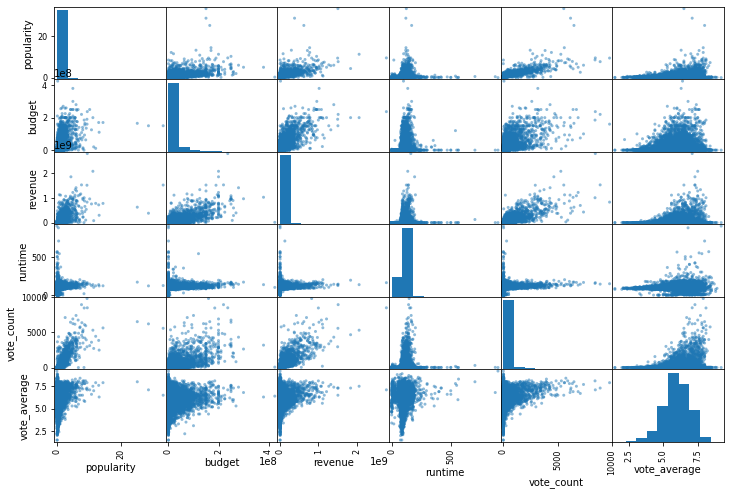

In [20]:
# Plotting numerical variables:
pd.plotting.scatter_matrix(df[numerical], figsize=(12, 8))
plt.show()

### Research Question 1:
### What is the size of investments in movie industry in the given years? Does it increase/decline with time?

We can investigate the budget column as follows:

In [21]:
# Investigating Summary statistics of the budget column
df.loc[df['budget'] != 0, ['budget']].describe()

,budget
count,5.169000e+03
mean,3.073958e+07
std,3.890441e+07
min,1.000000e+00
25%,6.000000e+06
50%,1.700000e+07
75%,4.000000e+07
max,4.250000e+08


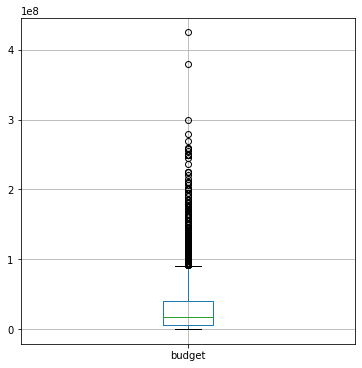

In [22]:
# Plotting the budget column:
df.loc[df['budget'] != 0,['budget']].boxplot(figsize=(6, 6));

It appears that:
1. The lowest budget was around 1 Dollar (??).
2. About 50% of the movies had budgets around or below 17,000,000 Dollars.
3. There are some movies with huge budgets that can be considered outliers.

In fact, we can explore the first 10 movies with highest budgets:

In [23]:
# Sorting according to budget & exploring first 10 movies:
df.sort_values(by='budget', ascending=False)[['original_title', 'budget']].head(10)

,original_title,budget
id,,
46528,The Warrior's Way,425000000
1865,Pirates of the Caribbean: On Stranger Tides,380000000
285,Pirates of the Caribbean: At World's End,300000000
99861,Avengers: Age of Ultron,280000000
1452,Superman Returns,270000000
49529,John Carter,260000000
38757,Tangled,260000000
559,Spider-Man 3,258000000
57201,The Lone Ranger,255000000


Next, We can investigate the change in investments over time as follows:

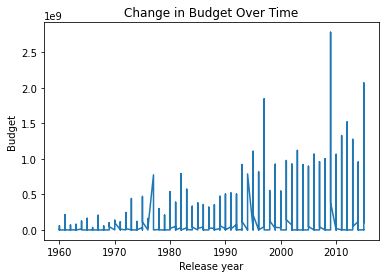

In [24]:
# Sorting by release year:
df_sorted_years = df.sort_values(by='release_year')

# Plotting increase/decrease over time:
fig, ax = plt.subplots()
ax.plot(df_sorted_years['release_year'], df_sorted_years['revenue'])
ax.set(title='Change in Budget Over Time',
      xlabel='Release year', ylabel='Budget')
plt.show()

It appears that the size of investments in movie industry has grown enormously since the 1950's.

### Research Question 2:
### What detetmines a movie success? is there any correlation between revenue and popularity?

We can explore the type of correlation between revenue & popularity:

In [25]:
corr_matrix = df[df['revenue'] != 0].corr()

In [26]:
corr_matrix['revenue'].sort_values(ascending=False)

revenue         1.000000
vote_count      0.764113
budget          0.704009
popularity      0.629305
runtime         0.237748
vote_average    0.206847
Name: revenue, dtype: float64

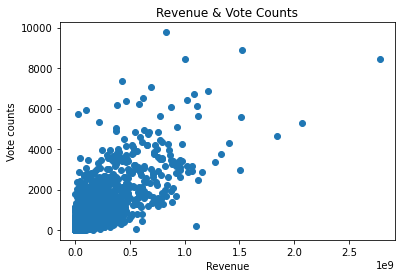

In [27]:
# Plotting the relation between revenue & volte counts
fig, ax = plt.subplots()
ax.scatter(df['revenue'], df['vote_count'])
ax.set(title='Revenue & Vote Counts',
      xlabel='Revenue', ylabel='Vote counts')
plt.show()

It appears there is a positive correlation between the two, this may help us to draw more insights from the rows in which revenue values are zeroes!

### Research Question 3:
### Is there any correlation between budget & revenue?

We can explore the type of correlation between revenue & budget:

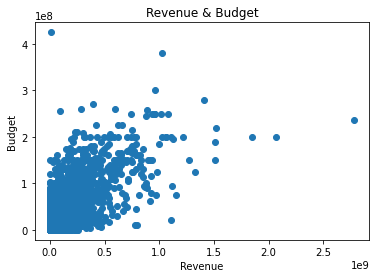

In [28]:
# Plotting revenue against budget:
fig, ax = plt.subplots()
ax.scatter(df['revenue'], df['budget'])
ax.set(title='Revenue & Budget',
      xlabel='Revenue', ylabel='Budget')
plt.show()

It appears there is a positive correlation between the two, this may indicate that the budget size is an importnant determining factor for a movies success!

### Research Question 4:
### What is the most frequent genre(s) in top movies?

This question can be answered as follows:

1. Investigating top 10 genres with the highest overall revenue:

In [29]:
# Masking only rows with revenues > 0:
revenue_not_zero = df['revenue'] != 0

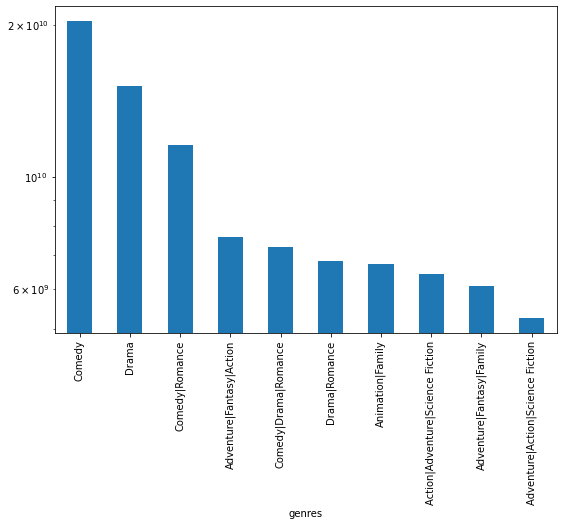

In [30]:
# Grouping & sorting genres according to overall revenue to get the top 10 genres:
top_10_genres = df[revenue_not_zero].groupby('genres')['revenue'].sum().sort_values(ascending=False).head(10)

# Plotting top 10 genres with highest overall revenue:
top_10_genres.plot(kind='bar', figsize=(9, 6)).set_yscale('log');

2. Investigating the distribution of individual revenues inside each genre:

In [31]:
# Investigating the median & mean budgets for the top 10 genres:
is_genre_top_10 = df['genres'].isin(top_10_genres.index.values.tolist())
top_10_genres_stats = df[revenue_not_zero & is_genre_top_10].groupby('genres')['revenue'].describe()
top_10_genres_stats.loc[:, ['50%', 'mean']].sort_values(by='50%', ascending=False)

,50%,mean
genres,,
Adventure|Fantasy|Family,833246518.0,6.079516e+08
Adventure|Action|Science Fiction,538400000.0,4.778434e+08
Adventure|Fantasy|Action,444115007.0,5.064989e+08
Action|Adventure|Science Fiction,315943847.5,4.586060e+08
Animation|Family,200527955.5,3.046239e+08
Comedy,40442437.0,6.752123e+07
Comedy|Romance,33836547.5,8.017864e+07
Comedy|Drama|Romance,25079820.0,5.754901e+07
Drama|Romance,18792319.5,4.532075e+07


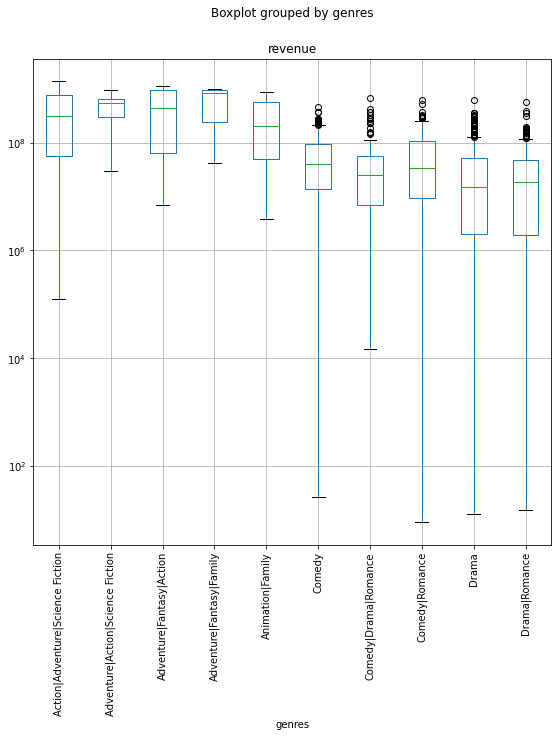

In [32]:
# Plotting the distribution of budgets for the top 10 genres:
df[revenue_not_zero & is_genre_top_10].boxplot(column='revenue', by='genres', figsize=(9, 9), rot=90).set_yscale('log');

### Research Question 5:
### What is the most frequent production companies in top movies?

This question can be answered as follows:

1. Investigating top 10 production companies with the highest overall revenue:

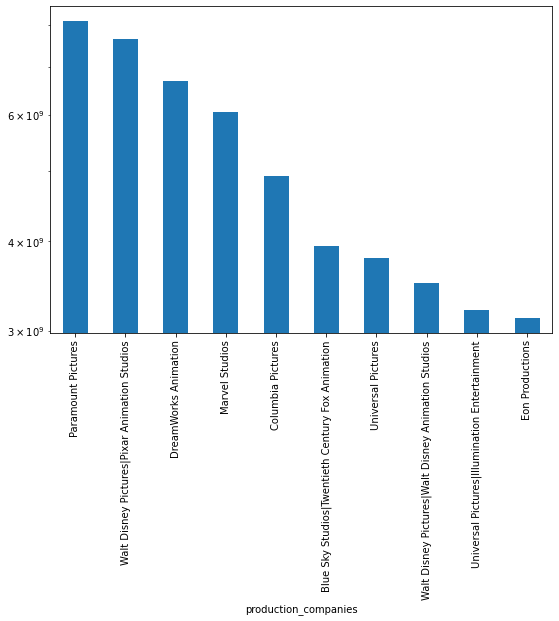

In [33]:
# Grouping & sorting production companies according to overall revenue to get the top 10 genres:
top_10_co = df[revenue_not_zero].groupby('production_companies')['revenue'].sum().sort_values(ascending=False).head(10)

# Plotting top 10 production companies with highest overall revenue:
top_10_co.plot(kind='bar', figsize=(9, 6)).set_yscale('log');

2. Investigating the distribution of individual revenues inside each production company:

In [34]:
# Investigating the median & mean budgets for the top 10 production companies:
is_co_top_10 = df['production_companies'].isin(top_10_co.index.values.tolist())
top_10_co_stats = df[revenue_not_zero & is_co_top_10].groupby('production_companies')['revenue'].describe()
top_10_co_stats.loc[:, ['50%', 'mean']].sort_values(by='50%', ascending=False)

,50%,mean
production_companies,,
Walt Disney Pictures|Pixar Animation Studios,559852396.0,5.883507e+08
Universal Pictures|Illumination Entertainment,543513985.0,6.407602e+08
Blue Sky Studios|Twentieth Century Fox Animation,500188435.0,5.626886e+08
Marvel Studios,499183581.5,5.039924e+08
DreamWorks Animation,381509870.0,4.451161e+08
Walt Disney Pictures|Walt Disney Animation Studios,288512879.5,4.373409e+08
Eon Productions,271655534.0,3.126131e+08
Paramount Pictures,43008075.0,7.567611e+07
Columbia Pictures,37803872.0,9.657802e+07


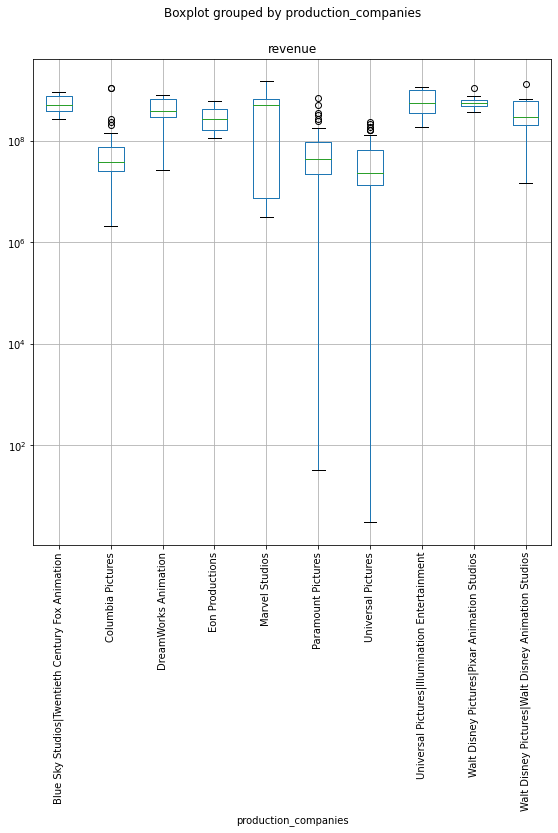

In [35]:
# Plotting the distribution of budgets for the top 10 production companies:
df[revenue_not_zero & is_co_top_10].boxplot(column='revenue', by='production_companies', figsize=(9, 9), rot=90).set_yscale('log');

### Research Question 6:
### Who is/are the most frequent cast members in the most popular movies?

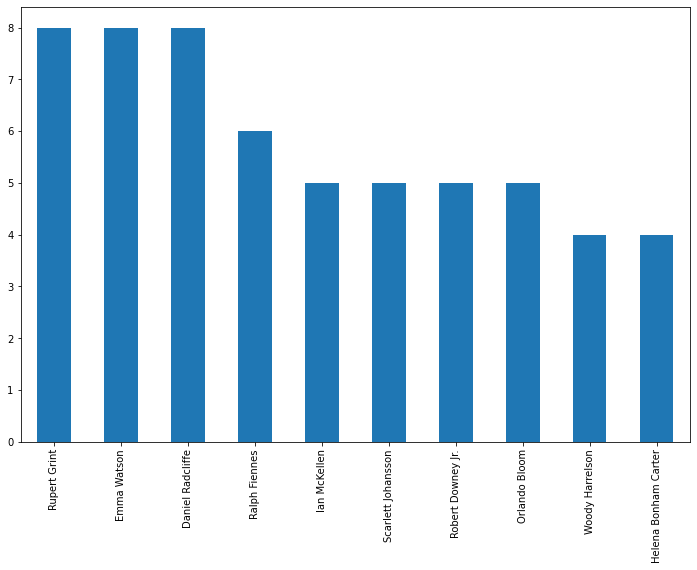

In [36]:
# Counting most frequent cast members in top 100 popular movies:
top_100_df = df.sort_values(by='popularity', ascending=False).head(100)
top_100_cast = pd.Series(top_100_df['cast'].str.cat(sep='|').split('|'))
frequent_cast_in_top_100 = top_100_cast.value_counts(ascending=False).head(10)
frequent_cast_in_top_100.plot(kind='bar', figsize=(12, 8));

<a id='conclusions'></a>
## Conclusion(s)

### Data limitations:
1. A lot of irrelevant columns.
2. So many null values (we don't know the exact mechanism why they are missing).
3. The revenue and budget columns contain more than 50% zeroes!
4. The data contain outliers.

### Dran insights:
1. The size of investments continue to grow overtime.
2. There is a good correlation between revenue and popularity.
3. There is a good correlation between revenue and budget.

### Final conclusion:
The formula for a successful movie:
1. Suitable budget.
2. Popular genre(s): Most popular movie genres are mentioned above.
3. Successful production company: Most successful production companies are mentioned above.
4. Popular actors: Most popular cast members are are mentioned above.